### Récupération du dataset

In [ ]:
import kagglehub as kh
import pandas as pd

# Télécharger le dataset dans un dossier local
dataset_ref = "zalando-research/fashionmnist"
path = kh.dataset_download(dataset_ref)

# Localiser les fichiers CSV dans le dossier téléchargé
train_csv_file = f"{path}/fashion-mnist_train.csv"
test_csv_file = f"{path}/fashion-mnist_test.csv"

# Charger le fichier CSV dans un DataFrame (taille réduite)
df_train = pd.read_csv(train_csv_file)[:10000]
df_test = pd.read_csv(test_csv_file)[:2000]



In [8]:
display(df_train)
df_train.info()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,2,0,0,1,...,111,85,35,0,0,0,0,0,0,0
9996,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,8,0,0,0,2,0,22,126,0,5,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [9]:
display(df_test)
df_test.info()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2,0,0,0,0,0,0,0,0,1,...,0,0,0,132,158,68,0,0,0,0
1996,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,72,77,86,46,0
1997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,139,182,120,0,0,0
1998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 12.0 MB


In [10]:
# Séparation features / target
X_train = df_train.drop(columns='label')
y_train= df_train['label']
X_test = df_test.drop(columns='label')
y_test= df_test['label']

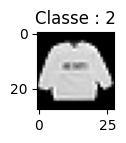

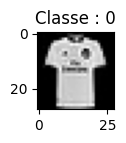

In [11]:
# Affichage d'une image de train et de test
import matplotlib.pyplot as plt

plt.figure(figsize=(1,1))
img = X_train.iloc[0].values.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(f"Classe : {y_train[0]}")
plt.show()

plt.figure(figsize=(1,1))
img = X_test.iloc[0].values.reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(f"Classe : {y_test[0]}")
plt.show()

### LLE

In [14]:
# Décomposition LLE sur 2 composantes
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE
lle = LocallyLinearEmbedding(n_neighbors=50, n_components=2, method='modified', random_state = 42)
X_train_lle = lle.fit_transform(X_train)
X_test_lle = lle.transform(X_test)


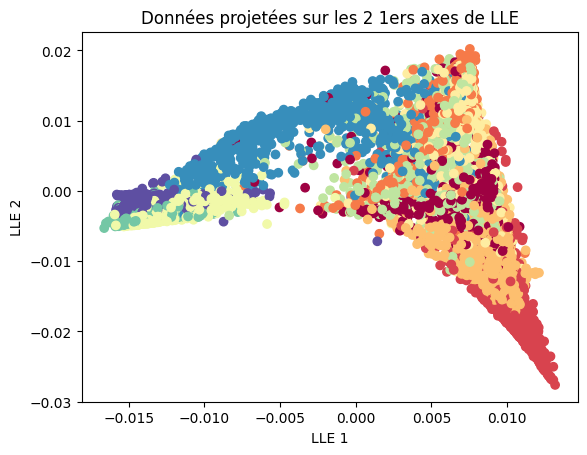

In [15]:
# Affichage des 2 composantes principales
plt.scatter(X_train_lle[:,0],X_train_lle[:,1],c=y_train,cmap=plt.cm.Spectral)
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.title("Données projetées sur les 2 1ers axes de LLE")
plt.show()


### IsoMap

In [16]:
# Décomposition Isomap sur 2 composantes
isomap = Isomap(n_neighbors=50, n_components=2)
X_train_iso = isomap.fit_transform(X_train)
X_test_iso = isomap.transform(X_test)

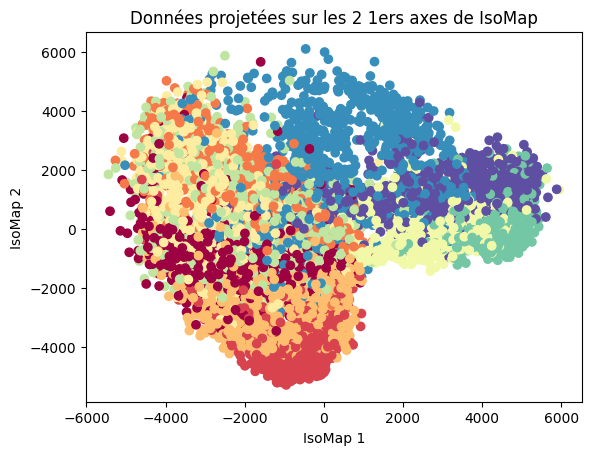

In [17]:
# Affichage des 2 composantes principales
plt.scatter(X_train_iso[:,0],X_train_iso[:,1],c=y_train,cmap=plt.cm.Spectral)
plt.xlabel('IsoMap 1')
plt.ylabel('IsoMap 2')
plt.title("Données projetées sur les 2 1ers axes de IsoMap")
plt.show()

### t-SNE

In [19]:
# Décomposition t-SNE sur 2 composantes
tsne = TSNE(n_components=2,method='barnes_hut')
X_train_tsne = tsne.fit_transform(X_train)

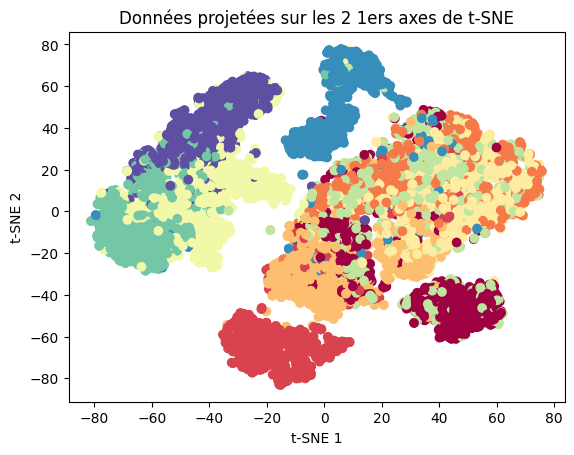

In [21]:
# Affichage des 2 composantes principales
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1],c=y_train,cmap=plt.cm.Spectral)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title("Données projetées sur les 2 1ers axes de t-SNE")
plt.show()

### UMAP

In [22]:
import umap
umap_model = umap.UMAP(n_neighbors = 15, min_dist = 0.1, n_components = 2)
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

d:\Sources\DS-Machine-Learning\ReductionDimensions\env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Sources\DS-Machine-Learning\ReductionDimensions\env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


d:\Sources\DS-Machine-Learning\ReductionDimensions\env\Lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Sources\DS-Machine-Learning\ReductionDimensions\env\Lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
d:\Sources\DS-Machine-Learning\ReductionDimensions\env\Lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than

<Axes: >

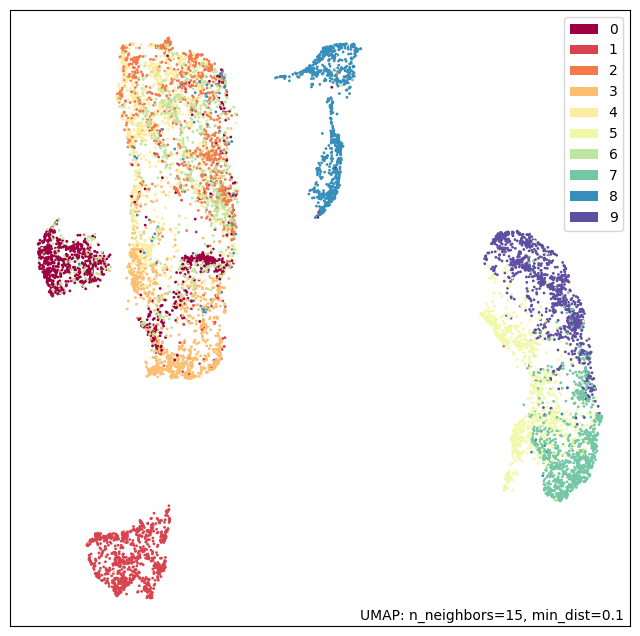

In [24]:
import umap.plot
umap.plot.points(umap_model, labels=y_train)

### UMAP avec modèle Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

umap_model = umap.UMAP(n_neighbors = 15, min_dist = 0.1, n_components = 6)
X_train_umap = umap_model.fit_transform(X_train)
X_test_umap = umap_model.transform(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train_umap,y_train)
rfc.score(X_test_umap,y_test)

d:\Sources\DS-Machine-Learning\ReductionDimensions\env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\Sources\DS-Machine-Learning\ReductionDimensions\env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.7765